In [19]:
import pypianoroll
import os
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [20]:
midifolder = '../data/giantmidi_small/'
midifiles = os.listdir(midifolder)
test_file = midifiles[1]
print(test_file)

Aaron, Michael, Piano Course, V8WvKK-1b2c.mid


In [21]:
main_piece = pypianoroll.read(midifolder + test_file, resolution=24)

In [22]:
pr = main_piece.tracks[0].pianoroll

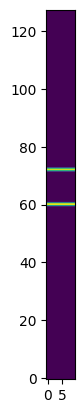

In [23]:
plt.imshow(pr[315:325,:].T, origin='lower')

In [24]:
# load twice, for melody and accompaniment, and delete complementary material
melody_piece = pypianoroll.read(midifolder + test_file, resolution=24)
accomp_piece = pypianoroll.read(midifolder + test_file, resolution=24)

mel_pr = melody_piece.tracks[0].pianoroll
acc_pr = accomp_piece.tracks[0].pianoroll

In [25]:
pr = np.array(melody_piece.tracks[0].pianoroll)
running_melody = -1
i = 0
# for i in range( pr.shape[0] ):
while i < pr.shape[0]:
    # check if any note
    if np.sum(pr[i,:]) > 0:
        # get running max
        running_max = np.max( np.nonzero( pr[i,:] ) )
        if i > 87 and i < 98:
            print(i)
            print('running_max: ', running_max)
        # check if there exists a running melody
        if running_melody > -1:
            if i > 87 and i < 98:
                print(i)
                print('running_melody > -1: ', running_melody)
            # check if running melody is continued
            if running_melody == running_max:
                if i > 87 and i < 98:
                    print(i)
                    print('running_melody == running_max: ', running_max)
                # remove all lower pitches from melody
                mel_pr[i, :running_max] = 0
                # remove higher pitch from accomp
                acc_pr[i, running_max] = 0
            else:
                if i > 87 and i < 98:
                    print(i)
                    print('running_melody != running_max: ', running_melody, running_max)
                # running melody may need to change
                # check if new highest pitch just started
                if running_max > running_melody:
                    # a new higher note has started
                    # finish previous note that was highest until now
                    j = 0
                    while j+i < mel_pr.shape[0] and mel_pr[i+j, running_melody] > 0 and running_max > running_melody:
                        if i > 87 and i < 98:
                            print('while: ', i, j)
                        mel_pr[i+j, :running_melody] = 0
                        mel_pr[i+j, running_melody+1:running_max] = 0
                        acc_pr[i+j, running_melody] = 0
                        acc_pr[i+j, running_max] = 0
                        if np.sum( pr[i+j,:] ) > 0:
                            running_max = np.max( np.nonzero( pr[i+j,:] ) )
                        else:
                            running_melody = -1
                            break
                        j += 1
                        # if j+i < pr.shape[0]:
                        #     if np.sum( pr[i+j,:] ) > 0:
                        #         running_max = np.max( np.nonzero( pr[i+j,:] ) )
                        #     else:
                        #         running_melody = -1
                        #         break
                    # start new running melody
                    i += j-1
                    running_melody = running_max
                else:
                    # i should be > 0 since we have that running_melody > -1
                    # a lower note has come
                    # if has begun earlier, it should be ignored
                    if pr[i-1, running_max] > 0:
                        if i > 87 and i < 98:
                            print(i)
                            print('lower max should be ignored: ', running_melody, running_max)
                        # its continuing an existing note - not part of melody
                        mel_pr[i, :] = 0
                        # running max should not be canceled, it remains as ghost max
                        # until a new higher max or a fresh lower max starts
                    else:
                        # a new fresh lower max starts that shouldn't be ignored
                        if i > 87 and i < 98:
                            print(i)
                            print('lower max should NOT be ignored: ', pr[i-1, running_max], pr[i, running_max], running_max)
                        # start new running melody
                        running_melody = running_max
                        # remove all lower pitches from melody
                        mel_pr[i, :running_max] = 0
                        # remove higher pitch from accomp
                        acc_pr[i, running_max] = 0
        else:
            # no running melody, check max conditions
            if i > 87 and i < 98:
                print(i)
                print('new note started: ', running_melody, running_max)
            # new note started - make it the running melody
            running_melody = running_max
            # remove all lower pitches from melody
            mel_pr[i, :running_max] = 0
            # remove higher pitch from accomp
            acc_pr[i, running_max] = 0
        # end if
    else:
        # there is a gap
        running_melody = -1
    # end if
    i += 1
# end for

88
running_max:  62
88
running_melody > -1:  72
88
running_melody != running_max:  72 62
88
lower max should be ignored:  72 62
89
running_max:  62
89
running_melody > -1:  72
89
running_melody != running_max:  72 62
89
lower max should be ignored:  72 62
90
running_max:  62
90
running_melody > -1:  72
90
running_melody != running_max:  72 62
90
lower max should be ignored:  72 62
91
running_max:  62
91
running_melody > -1:  72
91
running_melody != running_max:  72 62
91
lower max should be ignored:  72 62
92
running_max:  62
92
running_melody > -1:  72
92
running_melody != running_max:  72 62
92
lower max should be ignored:  72 62
93
running_max:  62
93
running_melody > -1:  72
93
running_melody != running_max:  72 62
93
lower max should be ignored:  72 62
94
running_max:  62
94
running_melody > -1:  72
94
running_melody != running_max:  72 62
94
lower max should be ignored:  72 62
95
running_max:  62
95
running_melody > -1:  72
95
running_melody != running_max:  72 62
95
lower max sh

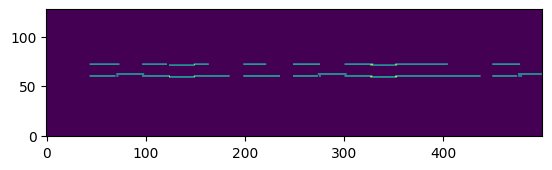

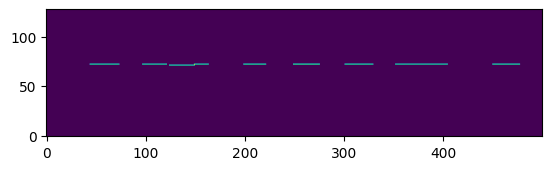

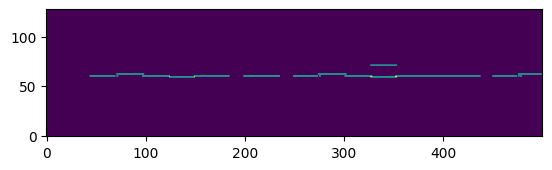

In [26]:
plt.imshow(pr[0:500,:].T, origin='lower')
plt.show()
plt.imshow(mel_pr[0:500,:].T, origin='lower')
plt.show()
plt.imshow(acc_pr[0:500,:].T, origin='lower')

In [27]:
melody_piece.write('test_data/melody.mid')
accomp_piece.write('test_data/accomp.mid')